In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
player = pd.read_csv('data/baseball/player.csv')
salary = pd.read_csv('data/baseball/salary.csv')
appearances = pd.read_csv('data/baseball/appearances.csv')
batting = pd.read_csv('data/baseball/batting.csv')
fielding = pd.read_csv('data/baseball/fielding.csv')
team = pd.read_csv('data/baseball/team.csv')
pitching = pd.read_csv('data/baseball/pitching.csv')

## Players

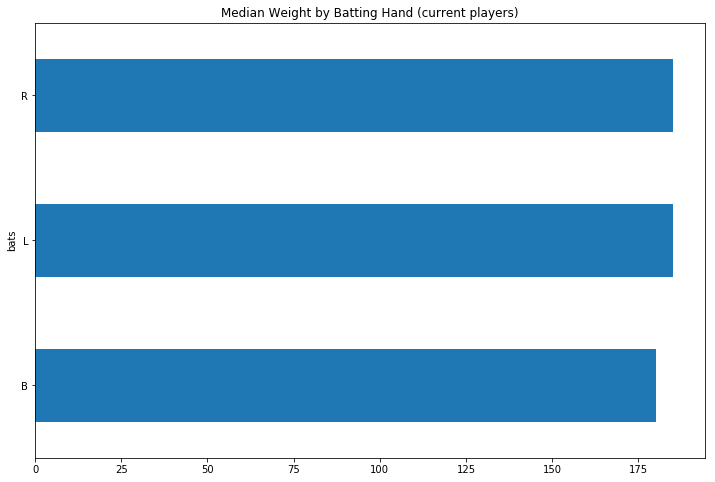

In [3]:
player.groupby('bats')['weight'].median().plot(kind='barh', figsize=(12,8),
                                                       title='Median Weight by Batting Hand (current players)')

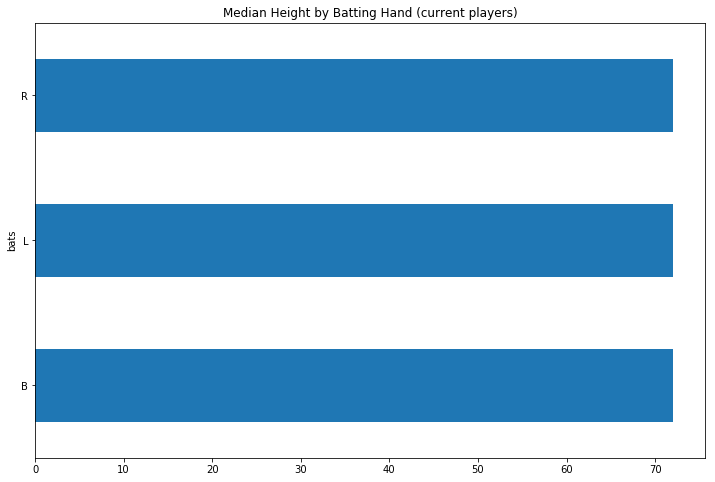

In [4]:
player.groupby('bats')['height'].median().plot(kind='barh', figsize=(12,8),
                                                       title='Median Height by Batting Hand (current players)')

## Batting

In [5]:
batting['slug'] = (batting.h + batting.double + batting.triple * 2 + batting.hr * 3) / batting.ab
batting['avg'] = batting.h / batting.ab
batting['obp'] = (batting.h + batting.bb + batting.hbp) / (batting.ab + batting.bb + batting.hbp)
batting['ops'] = (batting.h + batting.double + batting.triple * 2 + batting.hr * 3 + batting.bb + batting.hbp) / (batting.ab + batting.bb + batting.hbp)
batting['woba'] = (batting.h*0.9 + batting.double*0.34 + batting.triple*0.66 + batting.hr*1.05 + batting.bb*0.72 + batting.hbp*0.75) / (batting.ab + batting.bb + batting.hbp)

In [6]:
slug = batting.groupby('year')['slug'].median()
avg = batting.groupby('year')['avg'].median()
obp = batting.groupby('year')['obp'].median()
ops = batting.groupby('year')['ops'].median()
woba = batting.groupby('year')['woba'].median()

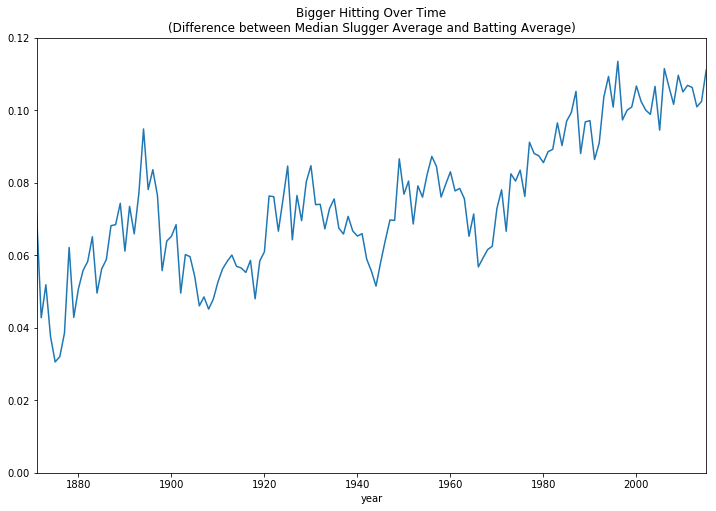

In [7]:
(slug - avg).plot(figsize=(12,8),
                  title='Bigger Hitting Over Time\n(Difference between Median Slugger Average and Batting Average)',
                 ylim=(0,0.12))

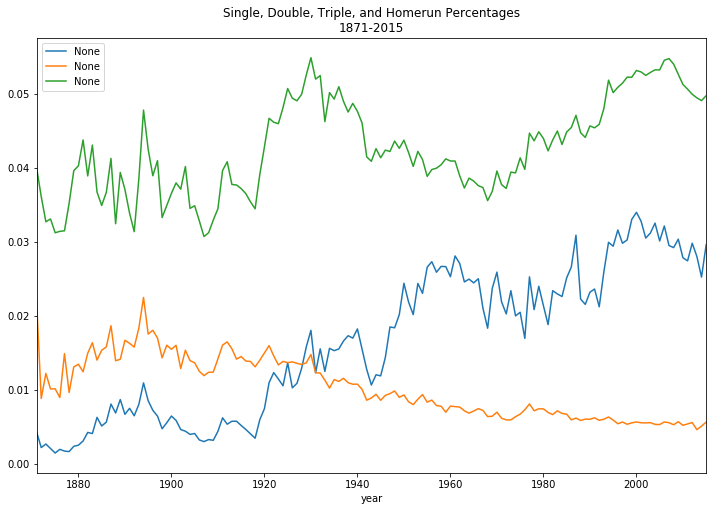

In [8]:
batting['single'] = batting.h - batting.hr - batting.double - batting.triple
hrs = batting.groupby('year')['hr'].sum()
triples = batting.groupby('year')['triple'].sum()
doubles = batting.groupby('year')['double'].sum()
singles = batting.groupby('year')['single'].sum()
ab = batting.groupby('year')['ab'].sum()

(hrs/ab).plot(figsize=(12,8), legend=True, title='Single, Double, Triple, and Homerun Percentages\n1871-2015')
(triples/ab).plot(figsize=(12,8), legend=True)
(doubles/ab).plot(figsize=(12,8), legend=True)
#(singles/ab).plot(figsize=(12,8), legend=True)

In [9]:
batting_2015 = batting[(batting.year == 2015) &
                       (batting.ab > 200)]
batting_2015['bb_avg'] = batting_2015.bb / batting_2015.ab
batting_2015['hr_avg'] = batting_2015.hr / batting_2015.ab
batting_2015['single_avg'] = batting_2015.single / batting_2015.ab
batting_2015['triple_avg'] = batting_2015.triple / batting_2015.ab
batting_2015['double_avg'] = batting_2015.double / batting_2015.ab
batting_2015['so_avg'] = batting_2015.so / batting_2015.ab

C:\Users\jnelson\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\jnelson\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jnelson\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


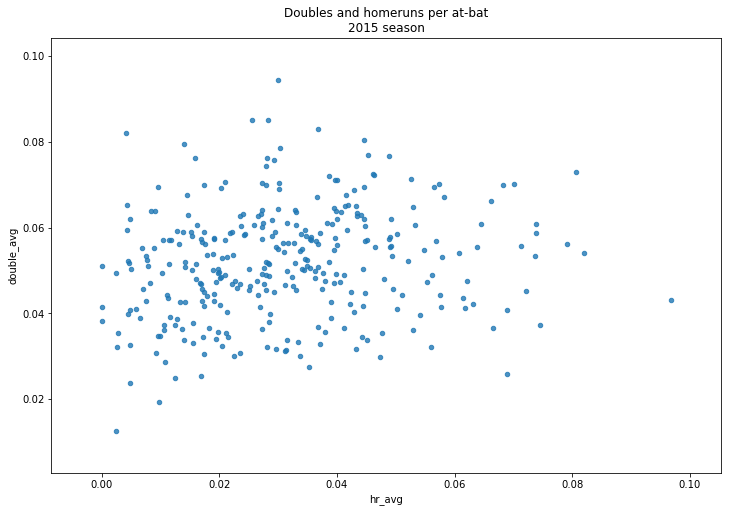

In [10]:
batting_2015.plot(x='hr_avg', y='double_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Doubles and homeruns per at-bat\n2015 season')

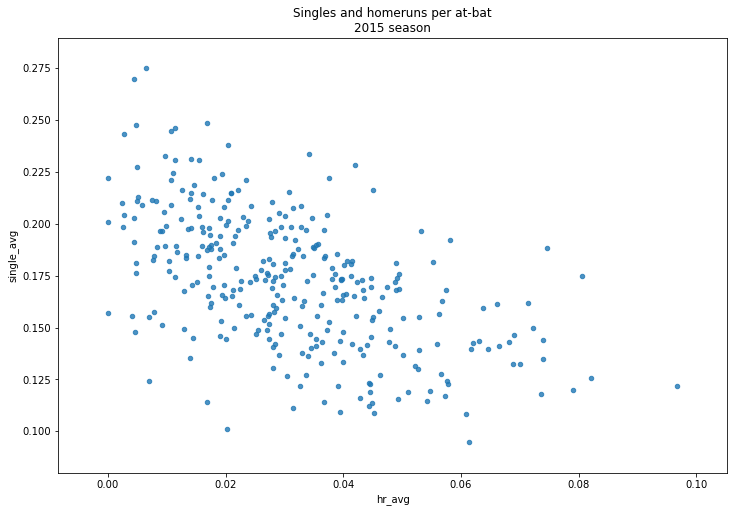

In [11]:
batting_2015.plot(x='hr_avg', y='single_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Singles and homeruns per at-bat\n2015 season')

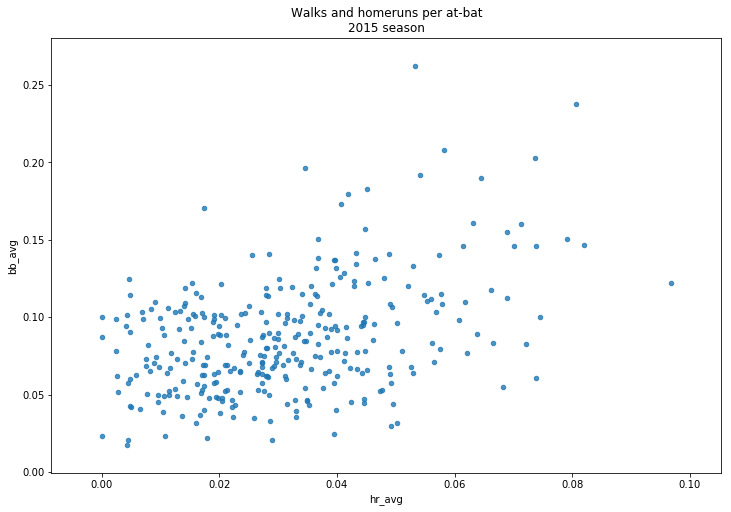

In [12]:
batting_2015.plot(x='hr_avg', y='bb_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Walks and homeruns per at-bat\n2015 season')

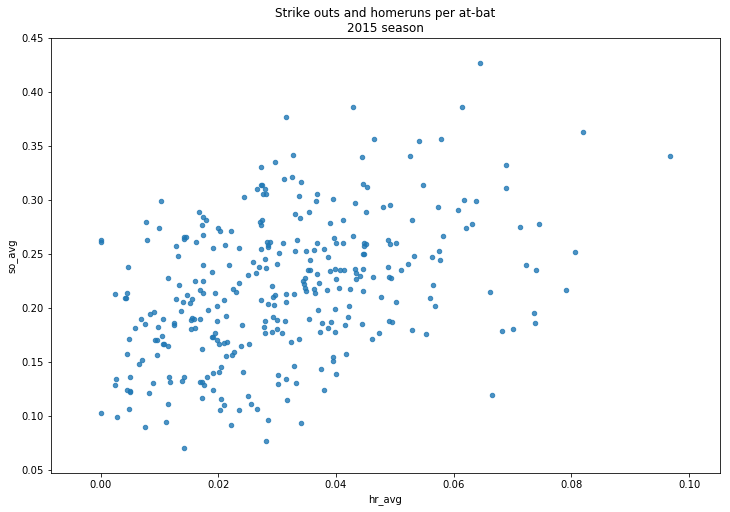

In [13]:
batting_2015.plot(x='hr_avg', y='so_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Strike outs and homeruns per at-bat\n2015 season')

### Explanation for Reduced Triples

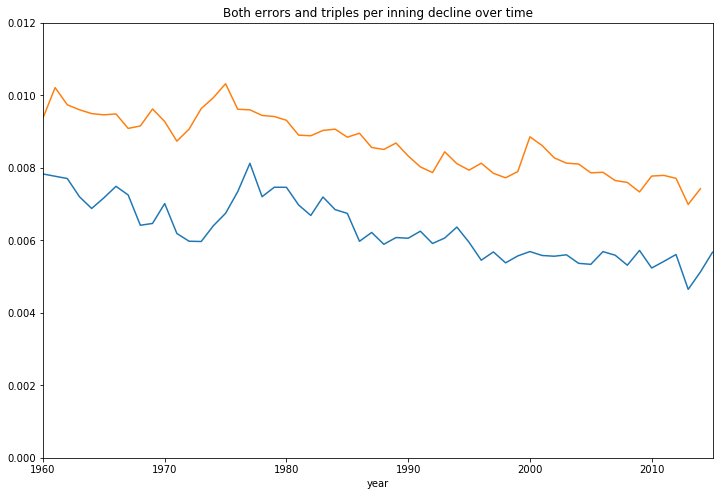

In [14]:
fielding = fielding[(fielding.inn_outs > 0) & (fielding.year > 1959)]
batting = batting[batting.year > 1959]
inns = fielding.groupby('year')['inn_outs'].sum()/3
errors = fielding.groupby('year')['e'].sum()

(triples/ab).plot(figsize=(12,8), xlim=(1960,2015), ylim=(0,.012))
(errors/inns).plot(figsize=(12,8), xlim=(1960,2015), title='Both errors and triples per inning decline over time')

In [15]:
career_batting = batting.groupby('player_id').sum()
career_batting = career_batting[career_batting.ab > 1000]
career_batting.hr.sort_values(ascending=False).head(10)

player_id
bondsba01    762.0
rodrial01    687.0
griffke02    630.0
thomeji01    612.0
sosasa01     609.0
mcgwima01    583.0
aaronha01    576.0
palmera01    569.0
jacksre01    563.0
pujolal01    560.0
Name: hr, dtype: float64

In [16]:
batting_player = batting.merge(player)

In [17]:
year_2015 = batting_player[batting_player.year == 2015]
year_2015.groupby('bats').size()

bats
B    111
L    426
R    949
dtype: int64

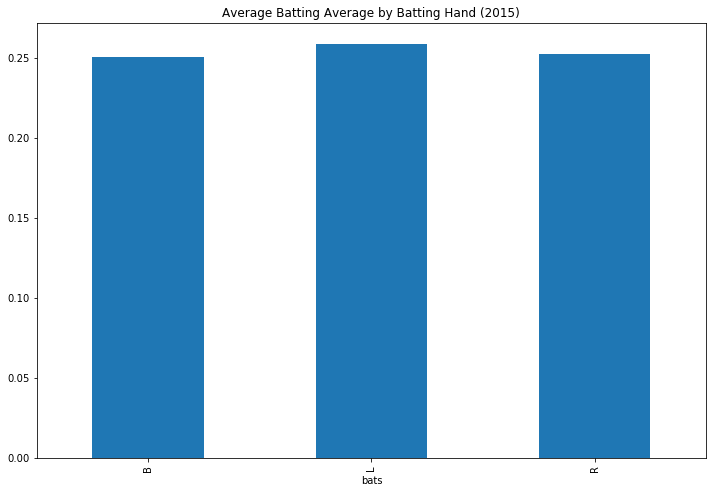

In [18]:
ab_2015 = year_2015.groupby('bats')['ab'].sum()
h_2015 = year_2015.groupby('bats')['h'].sum()
avg_2015 = h_2015 / ab_2015
avg_2015.plot(kind='bar', figsize=(12,8), title='Average Batting Average by Batting Hand (2015)')

In [35]:
batting_app = batting.merge(appearances)
batting_app = batting_app[batting_app.year > 2000]

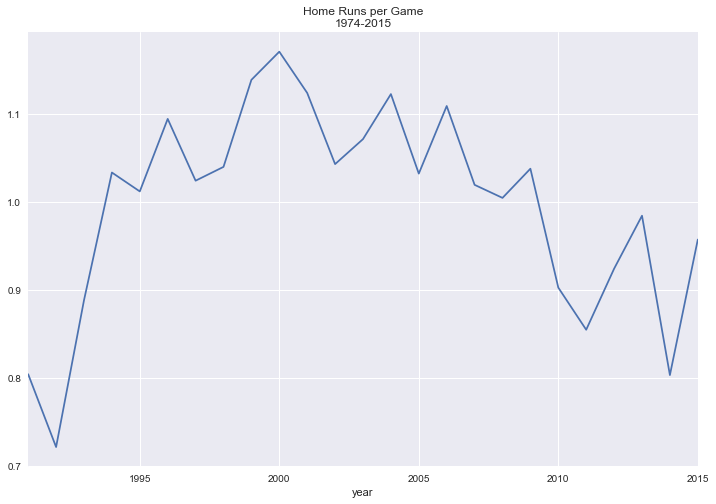

In [70]:
hr = batting_app.groupby('year')['hr'].sum()
gs = batting_app.groupby('year')['gs'].sum()
(hr/gs*9).plot(figsize=(12,8), title='Home Runs per Game\n1974-2015')

In [21]:
import seaborn
hr_g = batting_app.hr/batting_app.gs*9
hr_g

year
2001         NaN
2001    0.000000
2001    0.000000
2001    0.000000
2001    0.576923
2001    1.754717
2001    0.000000
2001         NaN
2001         NaN
2001    0.000000
2001    0.658537
2001         NaN
2001    0.000000
2001    0.000000
2001         NaN
2001    1.285714
2001    0.395604
2001    0.800000
2001         NaN
2001         NaN
2001         NaN
2001    1.153846
2001    0.571429
2001    1.813433
2001    0.642857
2001    0.000000
2001    1.565217
2001    0.000000
2001         NaN
2001    0.717391
          ...   
2015    0.000000
2015    0.000000
2015    0.000000
2015    0.707143
2015    0.000000
2015    0.000000
2015    0.000000
2015         NaN
2015    0.000000
2015    1.184211
2015    0.000000
2015    0.000000
2015         NaN
2015         NaN
2015         NaN
2015    0.516393
2015    0.000000
2015    0.000000
2015    1.636364
2015    0.439024
2015    0.000000
2015    0.000000
2015         NaN
2015    0.000000
2015    1.565217
2015    0.000000
2015    0.857143
2015    1

## Pitching

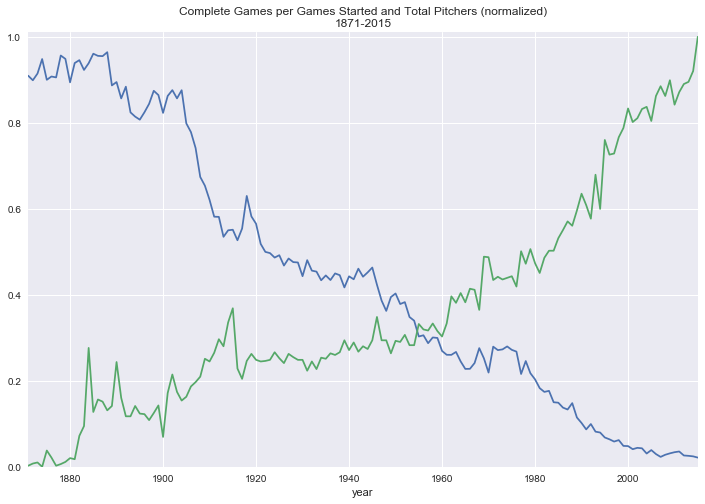

In [23]:
cg = pitching.groupby('year')['cg'].sum()
gs = pitching.groupby('year')['gs'].sum()
pitchers = pitching.groupby('year').size()
pitchers = (pitchers - min(pitchers)) / (max(pitchers) - min(pitchers))
(cg/gs).plot(figsize=(12,8), title='Complete Games per Games Started and Total Pitchers (normalized)\n1871-2015', ylim=0)
pitchers.plot(figsize=(12,8))

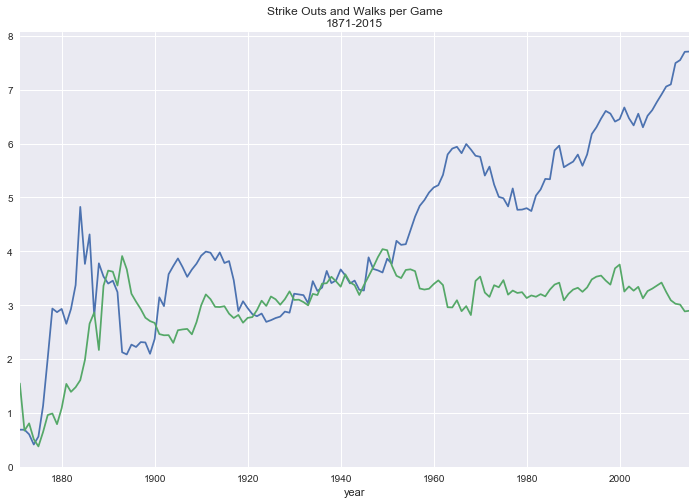

In [24]:
so = pitching.groupby('year')['so'].sum()
bb = pitching.groupby('year')['bb'].sum()
(so/gs).plot(figsize=(12,8), ylim=0)
(bb/gs).plot(figsize=(12,8), title='Strike Outs and Walks per Game\n1871-2015', ylim=0)

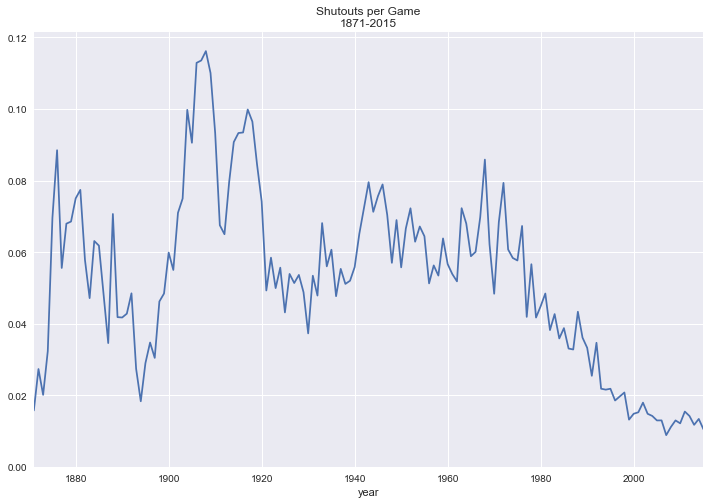

In [25]:
sho = pitching.groupby('year')['sho'].sum()
(sho/gs).plot(figsize=(12,8), title='Shutouts per Game\n1871-2015', ylim=0)

## Teams

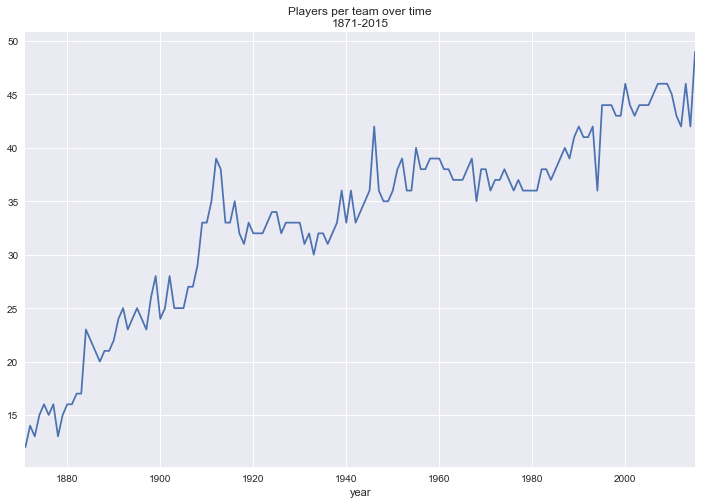

In [26]:
teams_per_year = appearances.groupby(['year','team_id']).size().groupby('year').size()
players_per_year = appearances.groupby('year').size()
players_per_team = players_per_year // teams_per_year
players_per_team.plot(title='Players per team over time\n1871-2015', figsize=(12,8))

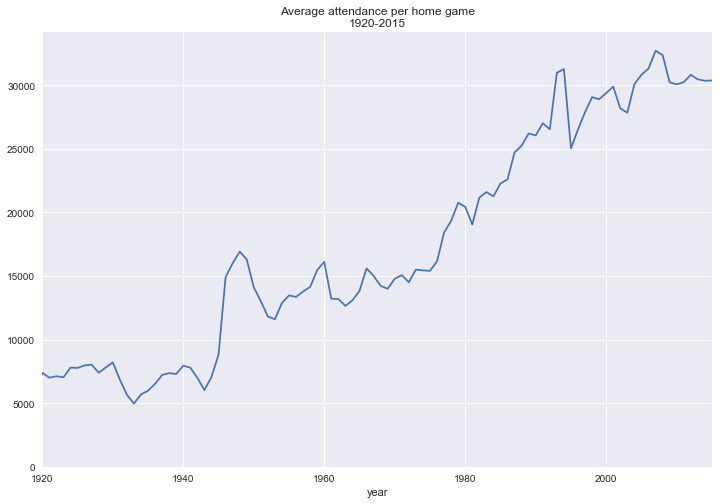

In [27]:
attendance = team.groupby('year')['attendance'].sum()
home = team.groupby('year')['ghome'].sum()
(attendance/home).plot(title='Average attendance per home game\n1920-2015', ylim=0, xlim=(1920,2015), figsize=(12,8))

In [66]:
batting_app = batting.merge(appearances)
batting_app = batting_app[batting_app.year > 1990]

In [67]:
hr_year = batting_app.groupby(['year', 'team_id'])['hr'].sum().unstack()
hr_year

team_id,ANA,ARI,ATL,BAL,BOS,CAL,CHA,CHN,CIN,CLE,...,PHI,PIT,SDN,SEA,SFN,SLN,TBA,TEX,TOR,WAS
year,,,,,,,,,,,,,,,,,,,,,
1991,NaN,NaN,141.0,170.0,126.0,115.0,139.0,159.0,164.0,79.0,...,111.0,126.0,121.0,126.0,141.0,68.0,NaN,177.0,133.0,NaN
1992,NaN,NaN,138.0,148.0,84.0,88.0,110.0,104.0,99.0,127.0,...,118.0,106.0,135.0,149.0,105.0,94.0,NaN,159.0,163.0,NaN
1993,NaN,NaN,169.0,157.0,114.0,114.0,162.0,161.0,137.0,141.0,...,156.0,110.0,153.0,161.0,168.0,118.0,NaN,181.0,159.0,NaN
1994,NaN,NaN,137.0,139.0,120.0,120.0,121.0,109.0,124.0,167.0,...,80.0,80.0,92.0,153.0,123.0,108.0,NaN,124.0,115.0,NaN
1995,NaN,NaN,168.0,173.0,175.0,186.0,146.0,158.0,161.0,207.0,...,94.0,125.0,116.0,182.0,152.0,107.0,NaN,138.0,140.0,NaN
1996,NaN,NaN,197.0,257.0,209.0,192.0,195.0,175.0,191.0,218.0,...,132.0,138.0,147.0,245.0,153.0,142.0,NaN,221.0,177.0,NaN
1997,161.0,NaN,174.0,196.0,185.0,NaN,158.0,127.0,142.0,220.0,...,116.0,129.0,152.0,264.0,172.0,144.0,NaN,187.0,147.0,NaN
1998,147.0,159.0,215.0,214.0,205.0,NaN,198.0,212.0,138.0,198.0,...,126.0,107.0,167.0,234.0,161.0,223.0,111.0,201.0,221.0,NaN
1999,158.0,216.0,197.0,203.0,176.0,NaN,162.0,189.0,209.0,209.0,...,161.0,171.0,153.0,244.0,188.0,194.0,145.0,230.0,212.0,NaN


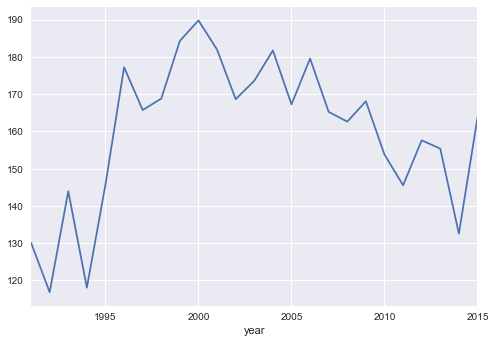

In [79]:
hr_year.transpose().mean().plot()

IndexError: index 0 is out of bounds for axis 0 with size 0

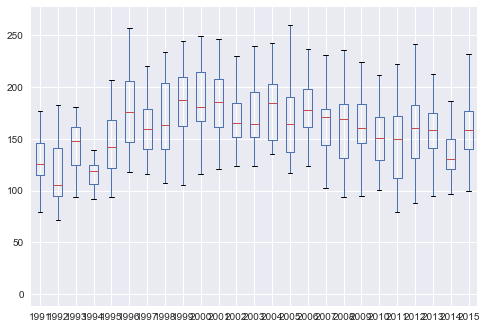

In [78]:
hr_year.transpose().boxplot()
hr_year.transpose().mean().plot()